## Apply logistic regression

In [1]:
import pandas as pd
data = pd.read_csv("data2.csv")

In [2]:
data.head()

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,familyMembers
0,0,0,3,male,22.0,1,0,7.2500,S,Mrs,1
1,1,1,1,female,38.0,1,0,71.2833,C,Mrs,1
2,2,1,3,female,26.0,0,0,7.9250,S,Miss,0
3,3,1,1,female,35.0,1,0,53.1000,S,Mrs,1
4,4,0,3,male,35.0,0,0,8.0500,S,Mrs,0


In [3]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data["Sex"]=encoder.fit_transform(data["Sex"])
data


,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,familyMembers
0,0,0,3,1,22.0,1,0,7.2500,S,Mrs,1
1,1,1,1,0,38.0,1,0,71.2833,C,Mrs,1
2,2,1,3,0,26.0,0,0,7.9250,S,Miss,0
3,3,1,1,0,35.0,1,0,53.1000,S,Mrs,1
4,4,0,3,1,35.0,0,0,8.0500,S,Mrs,0
...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,1,27.0,0,0,13.0000,S,Officer,0
887,887,1,1,0,19.0,0,0,30.0000,S,Miss,0
888,888,0,3,0,28.0,1,2,23.4500,S,Miss,3
889,889,1,1,1,26.0,0,0,30.0000,C,Mrs,0


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


x = data[['Pclass', 'Sex','Age']]
y = data['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  

logreg = LogisticRegression()   
logreg.fit(x_train, y_train) 
y_pred  = logreg.predict(x_test)
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.79


## confusion matrix 

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

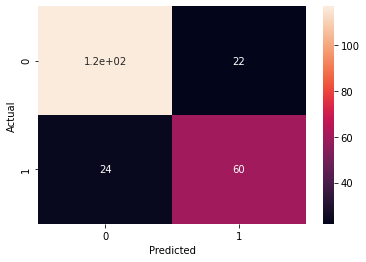

In [5]:
import seaborn as sns
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       139
           1       0.73      0.71      0.72        84

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



## ROC / AUC

In [6]:
from sklearn import svm, datasets
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

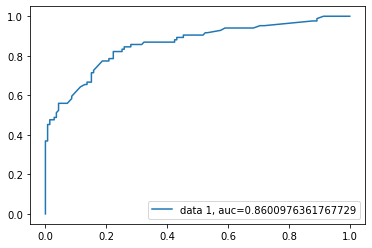

In [7]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### explanation of ROC / AUC:

### how it works: in a binary classification, we have a threshold that let your model decides wich class to choose each time.
### ROC curve is used to visualize the performance of a binary classifier. It is a plot of true positive rate1 on the y-axis vs the false positive rate² on the x-axis for every possible classification threshold. 

### The AUC is the measure of the ability of a classifier to distinguish between classes. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

### ² false positive rate: The false positive rate is calculated as the ratio between the number of negative events wrongly categorized as positive (false positives) and the total number of actual negative events
### 1true positive rate: the percentage of actual positives which are correctly identified ( the ratio between the number of positive events correctly categorized as positive and the total number of actual positive events.